# Time-series Forecasting Project: Environmental Aspect of Steel Plant

# Business Understanding 

## Company Profile

Steelix Plant Corporation stands as a robust leader in the global steel industry, renowned for its high-quality production of steel coils, steel plates, and iron plates. With a commitment to innovation and reliability, Steelix serves a diverse range of sectors, from construction and automotive to manufacturing and infrastructure development. Our state-of-the-art facilities are equipped with advanced machinery, enabling us to consistently deliver products that meet rigorous international standards.

As a company deeply ingrained in heavy industry, Steelix Plant Corporation's environmental footprint is acutely recognized. The challenges posed by increased CO2 emissions are acknowledged, particularly during the colder months at the beginning and end of the year. It's indicated by internal analyses that this seasonal surge in emissions often correlates with a significant increase in power usage (in kWh). This heightened energy demand is primarily driven by intensified active machine operation to maintain production targets, alongside the substantial energy required for water boiling processes crucial to winter operations.

## Problem to be Solved

At Steelix, these environmental considerations are being addressed head-on. Active investment is being made in research and development to explore sustainable practices, optimize energy efficiency, and implement cutting-edge technologies. The mitigation of seasonal CO2 emissions, while ensuring uninterrupted, high-quality production, is crucial. For these underlying problems to be effectively solved, the critical role of a data scientist is emphasized, as their expertise is needed to analyze complex energy consumption patterns, identify key drivers of emissions, and develop predictive models for sustainable solutions. The vision is not only for the demands of the modern world for essential steel products to be met, but for this to be achieved in a manner that champions environmental stewardship and contributes to a greener, more sustainable future.

**The aim of this project are as follows:**
* To accurately analyze complex energy consumption patterns (usage in kWh) throughout the year, with a particular focus on seasonal variations (beginning and end of the year).
* To identify and quantify the primary factors (e.g., nsm, day_of_week, lagging current, leading current) contributing to increased power usage and correlated CO2 emissions, especially during winter.
* To build and validate robust machine learning models capable of forecasting future energy consumption (kWh) and associated CO2 emissions, enabling proactive management.
* To inform and support initiatives aimed at optimizing energy efficiency across plant operations by providing data-driven insights and predictive capabilities.
* To provide data-driven recommendations and tools that contribute to the implementation of sustainable energy practices and cutting-edge technologies within the steel manufacturing process.

## Why These Problems Matters to Us?


The issue of carbon dioxide emissions and tremendous power consumption from industrial activities, as seen at Steelix Plant Corporation, holds immense significance for our collective environmental responsibility and sustainability. These emissions directly fuel global warming and climate change, leading to severe consequences like extreme weather and rising sea levels that impact everyone. Beyond this critical environmental toll, there are significant business imperatives. Stricter regulatory compliance is becoming the norm, with penalties for non-adherence and expectations to align with international agreements like the Paris Agreement. Companies now face strong pressure for corporate responsibility, where managing their environmental footprint enhances reputation and meets growing consumer and investor demands for sustainability. Furthermore, reducing emissions often translates to economic benefits through improved energy efficiency and cost savings, positioning companies as leaders in a green economy.* Ultimately, proactively addressing these emissions is vital for a company's long-term viability, ensuring it can thrive in a future where sustainability is no longer an option, but a core determinant of success.

**Reference taken from a paper article titled "The Rising Threat of Atmospheric CO2: A Review on the Causes, Impacts, and Mitigation Strategies" written by Nunes (2023).*

## Environment Preparation

### Prepare & import required libraries

This process involves importing various necessary libraries for this project, including libraries for data handling and numerical operations, data visualization, and anything about machine learning (utility & data preprocessing, modeling, and evaluation)

In [1]:
# --- Import all prerequisite libraries ---
# Standard libraries
import os
import warnings
import math
warnings.filterwarnings('ignore') # Hide warning messages in output 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Libraries for data handling and numerical operations 
import numpy as np 
import pandas as pd 
from datetime import datetime, timedelta

# Libraries for visualization 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 

# Libraries for preprocessing & machine learning 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.optimizers import Adam

/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv


2025-05-30 04:19:36.357673: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748578776.553152      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748578776.609287      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Prepare required data

To kick off this project, our immediate focus is data acquisition. We'll pinpoint and gather all necessary Steelix Plant data from 2018. This foundational step ensures we have the historical information on energy consumption, machine operations, and environmental factors needed to begin our in-depth analysis and model development. Getting this data right is crucial for the entire project's success.

In [2]:
# Prepare the required data for this project 
raw_data = pd.read_csv("/kaggle/input/steel-industry-energy-consumption/Steel_industry_data.csv")
display(raw_data)

date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0      01/01/2018 00:15       3.17                                  2.95   
1      01/01/2018 00:30       4.00                                  4.46   
2      01/01/2018 00:45       3.24                                  3.28   
3      01/01/2018 01:00       3.31                                  3.56   
4      01/01/2018 01:15       3.82                                  4.50   
...                 ...        ...                                   ...   
35035  31/12/2018 23:00       3.85                                  4.86   
35036  31/12/2018 23:15       3.74                                  3.74   
35037  31/12/2018 23:30       3.78                                  3.17   
35038  31/12/2018 23:45       3.78                                  3.06   
35039  31/12/2018 00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

# Data Understanding

## Initial Exploration

Initial data inspection will involve meticulously checking the data types of all columns within the raw dataset. This ensures consistency and compatibility for subsequent cleaning and analysis steps.

In [3]:
# Display the raw data only by their data types
display(raw_data.dtypes)

date                                     object
Usage_kWh                               float64
Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
dtype: object

Based on the data type observed on each column in this raw data, here are the brief information of these columns (attributes) related to the defined goals of this project:
* **date:** Timestamp indicating the exact moment of data capture, recorded typically every 15 minutes. This is crucial for tracking temporal patterns of energy use and emissions. 
* **usage_kWh:** Active power consumed by the plant during the recorded interval (in kilowatt-hours, kWh). This is the primary indicator of the plant's energy demand and its direct contribution to the environmental footprint. 
* **Lagging_Current_Reactive.Power_kVarh:** Reactive power consumption from inductive loads (e.g., motors, transformers) (in kilovolt-ampere reactive-hours, kVarh). High lagging reactive power indicates inefficient energy utilization, impacting overall sustainability. 
* **Leading_Current_Reactive_Power_kVarh:** Reactive power consumption from capacitive loads (in kilovolt-ampere reactive-hours, kVarh). Similar to lagging reactive power, it affects power quality and efficiency.
* **CO2(tCO2):** Concentration of carbon dioxide emissions observed at the plant (in parts per million, ppm). This is a direct measure of the plant's environmental impact from greenhouse gas emissions.
* **Lagging_Current_Power_Factor:** The power factor associated with inductive loads (dimensionless, typically between 0 and 1). A lower power factor indicates poorer electrical efficiency, leading to higher energy losses and increased CO2 emissions for the same output. 
* **Leading_Current_Power_Factor:** The power factor associated with capacitive loads (dimensionless, typically between 0 and 1). Similar to lagging, it's an indicator of electrical system efficiency.
* **NSM:** Number of seconds from midnight (0-86399). This cyclical temporal feature helps in understanding daily operational patterns and their influence on energy consumption and emissions.
* **WeekStatus:** Categorical indicator denoting whether the data sample was observed during a weekday or a weekend. This helps identify weekly variations in plant activity and energy demand.
* **Day_of_week:** Categorical value representing the specific day of the week (e.g., Monday, Tuesday, Sunday) when the sample was observed. Useful for discerning specific daily operational rhythms.
* **Load_Type:** Categorical classification of the power consumption level for each observed sample (e.g., 'light', 'medium', or 'maximum' load). This aids in characterizing the intensity of operations and its energy/emission implications.

A critical first step is rectifying the 'date' column's incorrect 'object' data type. It must be converted to 'datetime' using pd.to_datetime, ensuring dayfirst=True handles any dd-mm-yyyy formats for accurate time-series analysis.

In [4]:
# --- Correction of wrong data type --- 
# Convert the wrong data type 'date' from object to datetime 
raw_data['date'] = pd.to_datetime(raw_data['date'], dayfirst=True)

# Display the raw data right after conversion 
display(raw_data.dtypes)

date                                    datetime64[ns]
Usage_kWh                                      float64
Lagging_Current_Reactive.Power_kVarh           float64
Leading_Current_Reactive_Power_kVarh           float64
CO2(tCO2)                                      float64
Lagging_Current_Power_Factor                   float64
Leading_Current_Power_Factor                   float64
NSM                                              int64
WeekStatus                                      object
Day_of_week                                     object
Load_Type                                       object
dtype: object

With 'date' now datetime, we'll verify the DataFrame's column and row counts. Crucially, we must also check thoroughly for any potential missing values, ensuring data completeness for analysis.

In [5]:
# Check data samples found in the dataset
print(f"There are {raw_data.shape[1]} columns & {raw_data.shape[0]} rows in this dataframe.")
print(f"There are {raw_data.isnull().sum().sum()} with missing values.\n")
display(raw_data) 

There are 11 columns & 35040 rows in this dataframe.
There are 0 with missing values.



date  Usage_kWh  Lagging_Current_Reactive.Power_kVarh  \
0     2018-01-01 00:15:00       3.17                                  2.95   
1     2018-01-01 00:30:00       4.00                                  4.46   
2     2018-01-01 00:45:00       3.24                                  3.28   
3     2018-01-01 01:00:00       3.31                                  3.56   
4     2018-01-01 01:15:00       3.82                                  4.50   
...                   ...        ...                                   ...   
35035 2018-12-31 23:00:00       3.85                                  4.86   
35036 2018-12-31 23:15:00       3.74                                  3.74   
35037 2018-12-31 23:30:00       3.78                                  3.17   
35038 2018-12-31 23:45:00       3.78                                  3.06   
35039 2018-12-31 00:00:00       3.67                                  3.02   

       Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
0                                      0.00        0.0   
1                                      0.00        0.0   
2                                      0.00        0.0   
3                                      0.00        0.0   
4                                      0.00        0.0   
...                                     ...        ...   
35035                                  0.00        0.0   
35036                                  0.00        0.0   
35037                                  0.07        0.0   
35038                                  0.11        0.0   
35039                                  0.07        0.0   

       Lagging_Current_Power_Factor  Leading_Current_Power_Factor    NSM  \
0                             73.21                        100.00    900   
1                             66.77                        100.00   1800   
2                             70.28                        100.00   2700   
3                             68.09                        100.00   3600   
4                             64.72                        100.00   4500   
...                             ...                           ...    ...   
35035                         62.10                        100.00  82800   
35036                         70.71                        100.00  83700   
35037                         76.62                         99.98  84600   
35038                         77.72                         99.96  85500   
35039                         77.22                         99.98      0   

      WeekStatus Day_of_week   Load_Type  
0        Weekday      Monday  Light_Load  
1        Weekday      Monday  Light_Load  
2        Weekday      Monday  Light_Load  
3        Weekday      Monday  Light_Load  
4        Weekday      Monday  Light_Load  
...          ...         ...         ...  
35035    Weekday      Monday  Light_Load  
35036    Weekday      Monday  Light_Load  
35037    Weekday      Monday  Light_Load  
35038    Weekday      Monday  Light_Load  
35039    Weekday      Monday  Light_Load  

[35040 rows x 11 columns]

As you can see, There are 11 columns & 35.040 rows and no missing values found whatsoever in this raw data. Now we can proceed to the statistical inspection of numerical columns in this raw data. 

In [6]:
# Observing statistical overview of numerical columns 
raw_data.describe().T

count                           mean  \
date                                    35040  2018-07-02 11:52:30.000000256   
Usage_kWh                             35040.0                      27.386892   
Lagging_Current_Reactive.Power_kVarh  35040.0                      13.035384   
Leading_Current_Reactive_Power_kVarh  35040.0                       3.870949   
CO2(tCO2)                             35040.0                       0.011524   
Lagging_Current_Power_Factor          35040.0                      80.578056   
Leading_Current_Power_Factor          35040.0                       84.36787   
NSM                                   35040.0                        42750.0   

                                                      min  \
date                                  2018-01-01 00:00:00   
Usage_kWh                                             0.0   
Lagging_Current_Reactive.Power_kVarh                  0.0   
Leading_Current_Reactive_Power_kVarh                  0.0   
CO2(tCO2)                                             0.0   
Lagging_Current_Power_Factor                          0.0   
Leading_Current_Power_Factor                          0.0   
NSM                                                   0.0   

                                                      25%  \
date                                  2018-04-02 05:56:15   
Usage_kWh                                             3.2   
Lagging_Current_Reactive.Power_kVarh                  2.3   
Leading_Current_Reactive_Power_kVarh                  0.0   
CO2(tCO2)                                             0.0   
Lagging_Current_Power_Factor                        63.32   
Leading_Current_Power_Factor                         99.7   
NSM                                               21375.0   

                                                      50%  \
date                                  2018-07-02 11:52:30   
Usage_kWh                                            4.57   
Lagging_Current_Reactive.Power_kVarh                  5.0   
Leading_Current_Reactive_Power_kVarh                  0.0   
CO2(tCO2)                                             0.0   
Lagging_Current_Power_Factor                        87.96   
Leading_Current_Power_Factor                        100.0   
NSM                                               42750.0   

                                                      75%  \
date                                  2018-10-01 17:48:45   
Usage_kWh                                         51.2375   
Lagging_Current_Reactive.Power_kVarh                22.64   
Leading_Current_Reactive_Power_kVarh                 2.09   
CO2(tCO2)                                            0.02   
Lagging_Current_Power_Factor                      99.0225   
Leading_Current_Power_Factor                        100.0   
NSM                                               64125.0   

                                                      max           std  
date                                  2018-12-31 23:45:00           NaN  
Usage_kWh                                          157.18      33.44438  
Lagging_Current_Reactive.Power_kVarh                96.91        16.306  
Leading_Current_Reactive_Power_kVarh                27.76      7.424463  
CO2(tCO2)                                            0.07      0.016151  
Lagging_Current_Power_Factor                        100.0     18.921322  
Leading_Current_Power_Factor                        100.0     30.456535  
NSM                                               85500.0  24940.534317

Next, we also inspect the statistical overview of categorical (or object) columns in this dataframe. 

In [7]:
# --- Observing statistical overview of categorical columns ---
# Define categorical features
cat_cols = raw_data.select_dtypes(include=object).columns.tolist()

# Display the statistical overview 
summary_df = pd.DataFrame()

for col in cat_cols:
    freqs = raw_data[col].value_counts().reset_index()
    freqs.columns = ['Unique Value', 'Frequency']
    freqs['Variable'] = col
    summary_df = pd.concat([summary_df, freqs], ignore_index=True)

display(raw_data.select_dtypes(include=object).describe())
print()
display(summary_df)

WeekStatus Day_of_week   Load_Type
count       35040       35040       35040
unique          2           7           3
top       Weekday      Monday  Light_Load
freq        25056        5088       18072

Unique Value  Frequency     Variable
0        Weekday      25056   WeekStatus
1        Weekend       9984   WeekStatus
2         Monday       5088  Day_of_week
3        Tuesday       4992  Day_of_week
4      Wednesday       4992  Day_of_week
5       Thursday       4992  Day_of_week
6         Friday       4992  Day_of_week
7       Saturday       4992  Day_of_week
8         Sunday       4992  Day_of_week
9     Light_Load      18072    Load_Type
10   Medium_Load       9696    Load_Type
11  Maximum_Load       7272    Load_Type

A statistical overview of our categorical features reveals key patterns. Weekdays, particularly Mondays, show the most frequent activity. Interestingly, the majority of recorded hourly power consumption falls under the 'light_load' classification. These insights highlight typical operational rhythms and energy demand profiles.

## Feature Exploration

### Helper for Visualization

This creation of helper functions for further visualization (box plot and line chart) helps us in visualizing several important features in raw data via exploratory analysis (EDA) with similar format of line chart or box plot.  

In [8]:
# --- Create some helper functions for exploratory visualization & beyond --- 
# 1). Box plot
def plot_boxplot(df, y_features, x_axis_col=None, ncols=2, width=None, height=None):
    if not y_features:
        print("No y_features provided.")
        return None
    if x_axis_col not in df.columns:
        print(f"Error: x_axis_col '{x_axis_col}' not found in dataframe.")
        return None

    nrows = math.ceil(len(y_features) / ncols)

    if height is None:
        height = 10
    if width is None:
        width = nrows * 4

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height),
                             constrained_layout=True) 

    if nrows > 1 and ncols > 1:
        axes = axes.flatten()
    elif nrows == 1 and ncols > 1:
        pass
    elif nrows > 1 and ncols == 1:
        pass
    else: 
        axes = [axes] 

    for i, y_feature in enumerate(y_features):
        ax = axes[i]

        if x_axis_col:
            sns.boxplot(x=x_axis_col, y=y_feature, data=df, ax=ax, palette='viridis')
            ax.set_xlabel(x_axis_col)
            ax.tick_params(axis='x', rotation=45)
        else:
            sns.boxplot(y=y_feature, data=df, ax=ax, palette='viridis')
            ax.set_xlabel("") 
            ax.tick_params(axis='x', labelbottom=False) 

        ax.set_title(f'Distribution of {y_feature}', fontsize=12)
        ax.set_ylabel(y_feature)
        ax.grid(axis='y', linestyle='--', alpha=0.7) 

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    if x_axis_col:
        fig.suptitle(f"Box plots of features by {x_axis_col}", fontsize=16, y=1.02)
    else:
        fig.suptitle("Box plots of feature distributions", fontsize=16, y=1.02)
        
    plt.tight_layout(rect=[0, 0, 1, 0.98])
    return fig


# 2). Line plot
def plot_line(df, y_features, x_axis_col='date', ncols=1, width=None, height=None, title=None, style_col=None):
    if not y_features:
        print("No y_features provided.")
        return None
        
    if x_axis_col not in df.columns:
        print(f"Error: x_axis_col '{x_axis_col}' not found in dataframe.")
        return None

    if style_col is not None and style_col not in df.columns:
        print(f"Error: style_col '{style_col}' not found in dataframe.")
        return None

    nrows = math.ceil(len(y_features) / ncols)

    if height is None:
        height = nrows * 5 
    if width is None:
        width = 12 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(width, height),
                             constrained_layout=True)

    if nrows * ncols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    palette = sns.color_palette("tab10", n_colors=df[style_col].nunique()) if style_col else None 

    for i, y_feature in enumerate(y_features):
        ax = axes[i] # Get the current subplot axis

        if style_col:
            # Plot multiple lines, one for each category in style_col
            sns.lineplot(x=x_axis_col, y=y_feature, hue=style_col, data=df, ax=ax, palette=palette, linewidth=1)
            ax.legend(title=style_col, loc='best')
        else:
            # Plot a single line
            sns.lineplot(x=x_axis_col, y=y_feature, data=df, ax=ax, linewidth=1)

        ax.set_title(f'{y_feature} over {x_axis_col}', fontsize=12)
        ax.set_xlabel(x_axis_col)
        ax.set_ylabel(y_feature)
        ax.grid(True, linestyle='--', alpha=0.6) # Add grid lines

        # Rotate x-axis labels if they are dates or long strings
        if x_axis_col == 'date' or df[x_axis_col].dtype == '<M8[ns]' or df[x_axis_col].dtype == 'object':
             fig.autofmt_xdate() # Automatically format date labels

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Add a main title to the figure
    if title:
        fig.suptitle(title, fontsize=16, y=1.02)
    else:
        fig.suptitle(f"Line Plots of {', '.join(y_features)}", fontsize=16, y=1.02)
        
    plt.tight_layout(rect=[0, 0, 1, 0.98]) # Adjust layout to prevent title overlap
    return fig

## Exploratory Data Analysis (EDA)

### Question 1: What were the trends of usage in 'Usage_kWh', Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'Lagging_Current_Reactive.Power_kVarh', and 'Leading_Current_Reactive_Power_kVarh' throughout 2018?

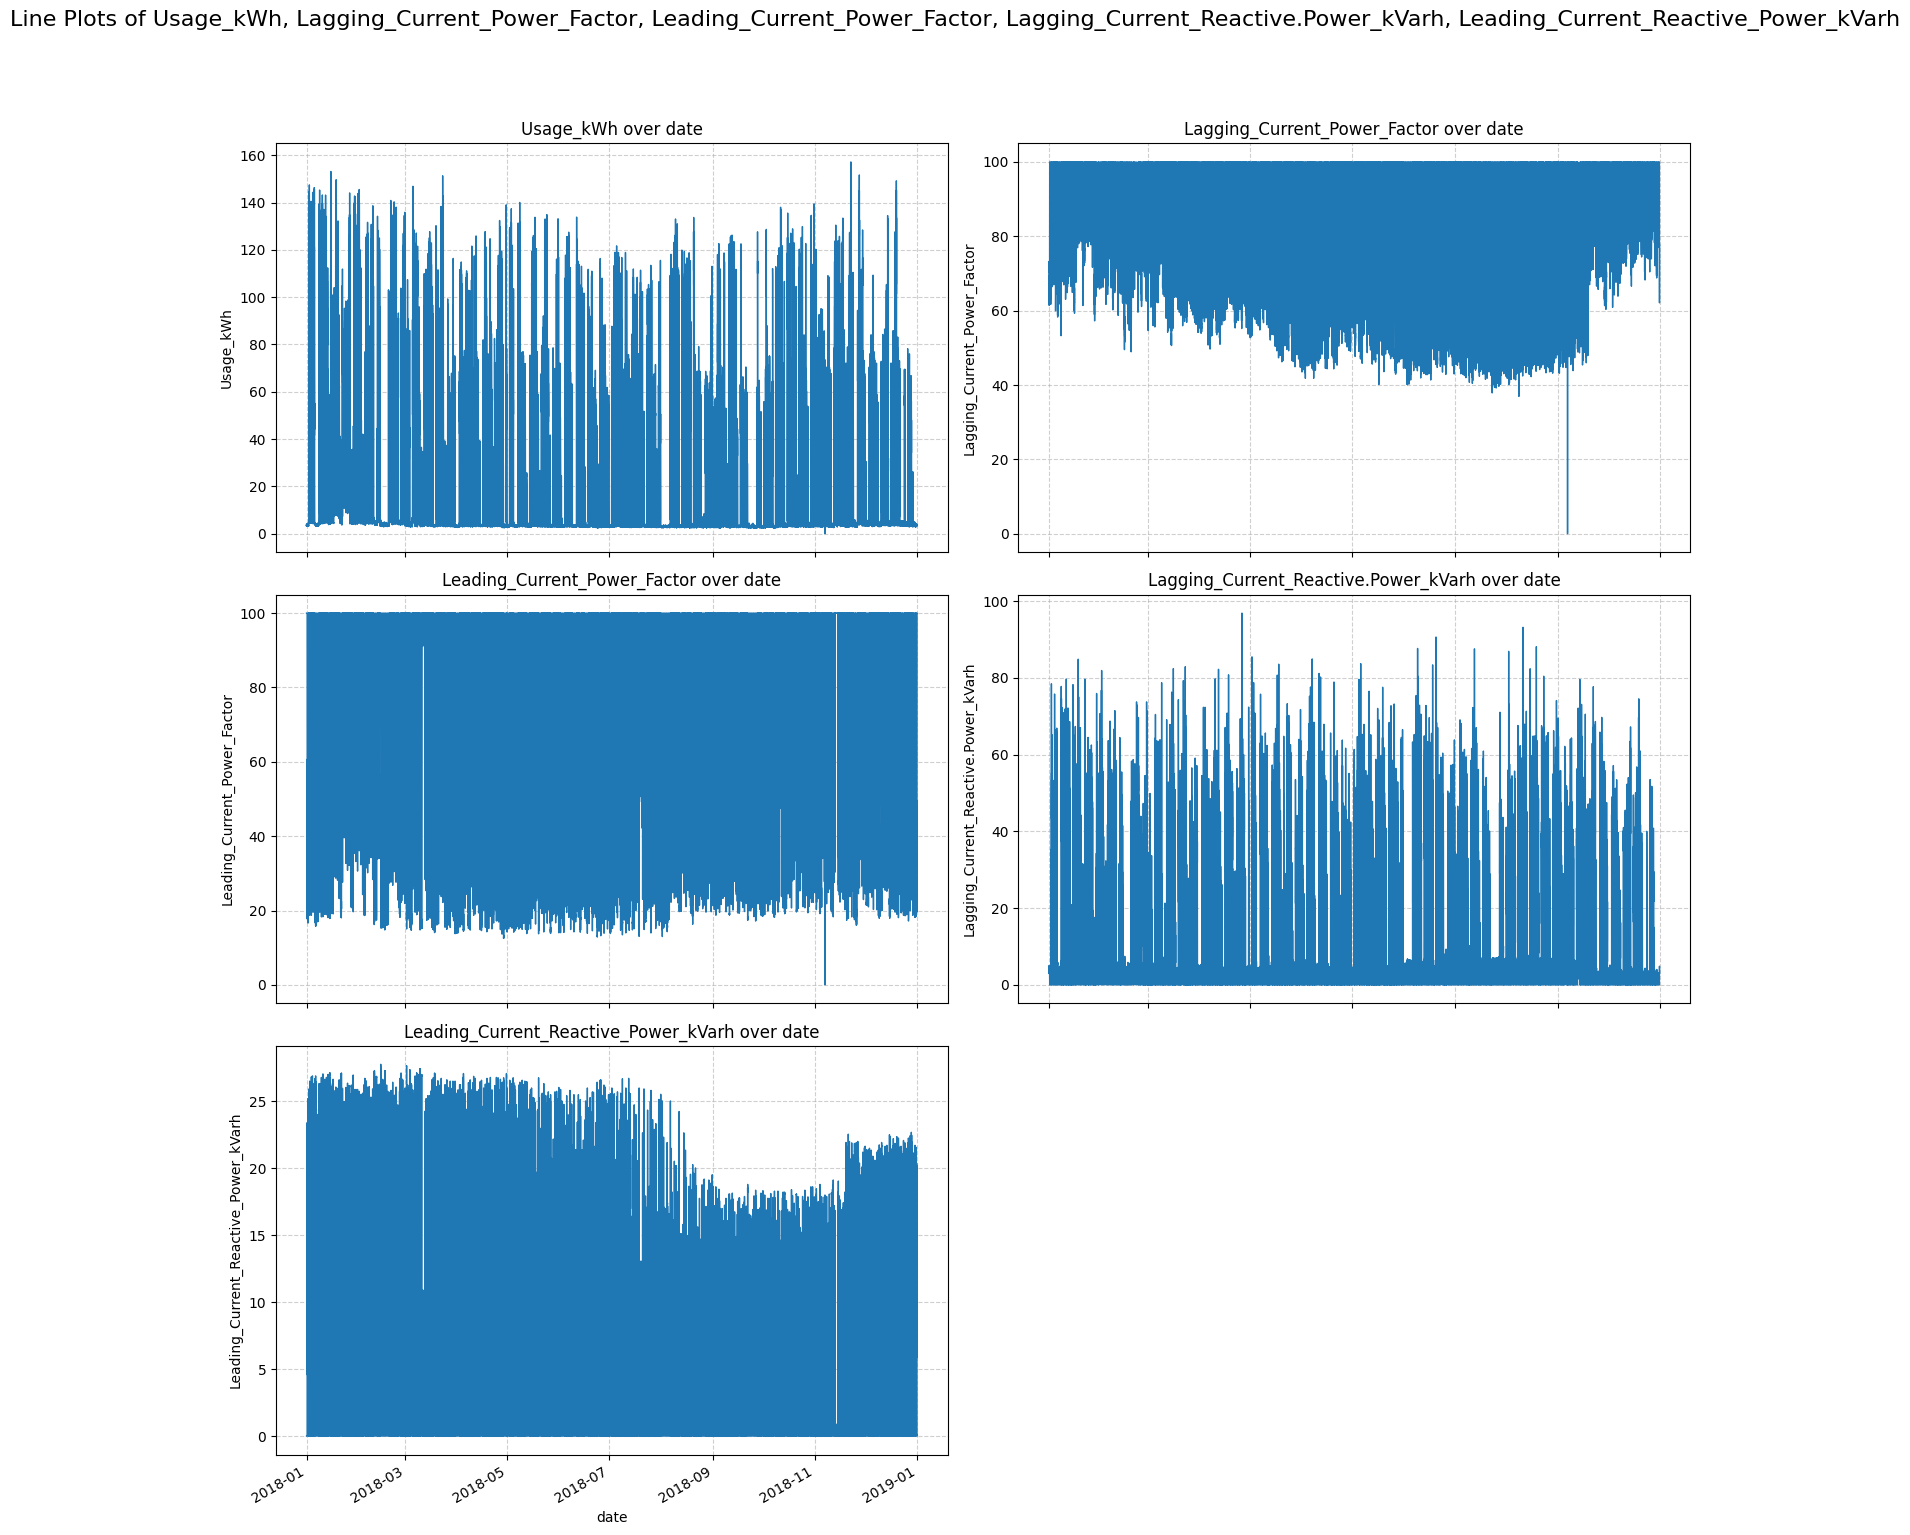

In [9]:
# --- Exploratory on 'usage in kwh', 'lagging current', 'leading current' in chronological order ---
# Sort data by 'date' 
plot_df = raw_data.sort_values(by='date')

# Define energy related features to be observed 
energy_factors = [
    'Usage_kWh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh'
]

# Visualization with line plot 
fig = plot_line(
    df=plot_df, 
    y_features=energy_factors,
    x_axis_col='date', 
    ncols=2,
    width=15,
    height=15
    )

if fig:
    plt.show() 

Analyzing the trends of key power consumption factors throughout 2018 at Steelix Plant Corporation reveals some interesting dynamics: 
* Usage in kWh saw a dip starting in May, then steadily climbed from September through year-end.
* Lagging Current Power Factor began around 60-70, declining by March and hitting a low of 40-50 in September before a significant surge to 70-80 in November, holding steady.
* Conversely, Leading Current Power Factor remained fairly stable between 20-40, with a sharp drop close to zero in November.
* Lagging Current Reactive Power generally stayed between 60-80, with occasional peaks exceeding 90 in May and November, varying with operational hours.
* Finally, Leading Current Reactive Power experienced a decline from August to a low of 15-20 in November, recovering slightly by year-end but not reaching its early 2018 levels of 25. These varied trends offer crucial insights for optimizing energy use.

### Question 2: What was the trend of CO2 throughout 2018?

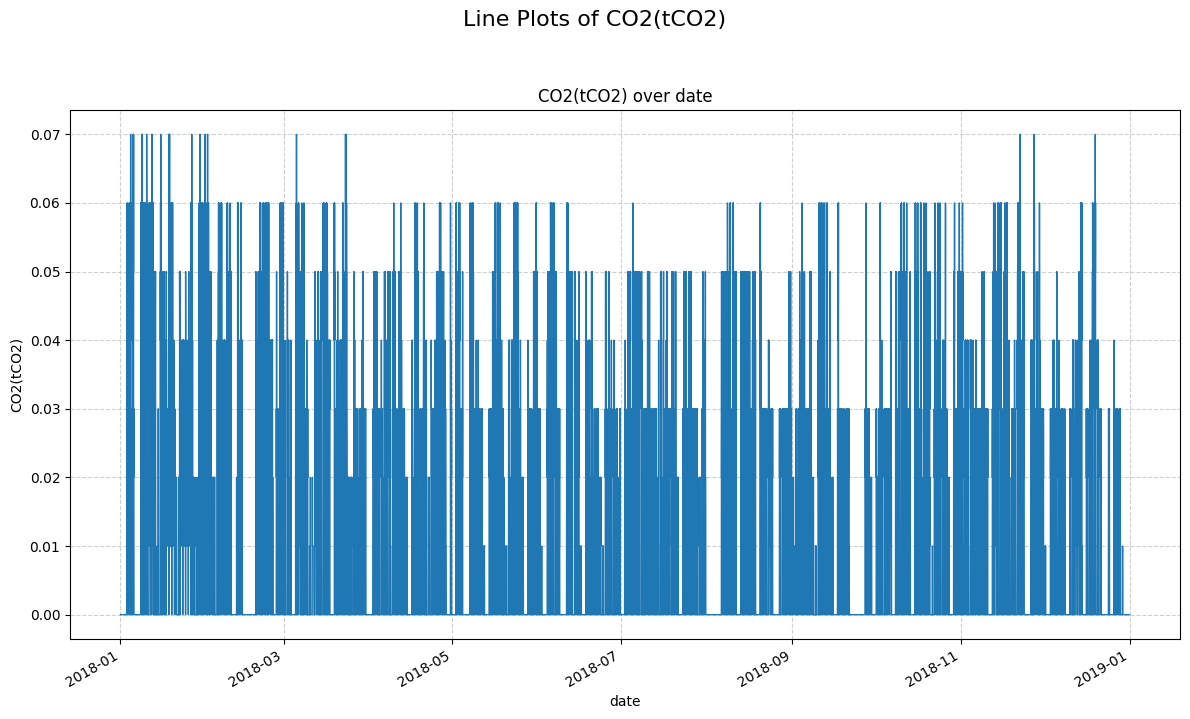

In [10]:
# --- Exploratory on 'CO2' in chronological order ---
# Sort data by 'date' 
plot_df = raw_data.sort_values(by='date')
co2 = ['CO2(tCO2)']

# Visualization with line plot 
fig = plot_line(
    df=plot_df, 
    y_features=co2,
    x_axis_col='date', 
    ncols=1,
    width=12,
    height=7 
    )

if fig:
    fig.show() 

The trend of CO2 concentration (in ppm) from the plant throughout 2018 showed a distinct seasonal pattern. Levels were typically at their highest, around 0.07 ppm, during the beginning and end of the year. This peak likely coincides with the colder winter months. Subsequently, CO2 concentration decreased to about 0.06 ppm, maintaining this lower level from May through November, a period outside the typical cold season.

### Question 3: What was the distribution of usage in kwh across day_of_week, week (status), and load_type (e.g., light, medium, maximum) throughout 2018?

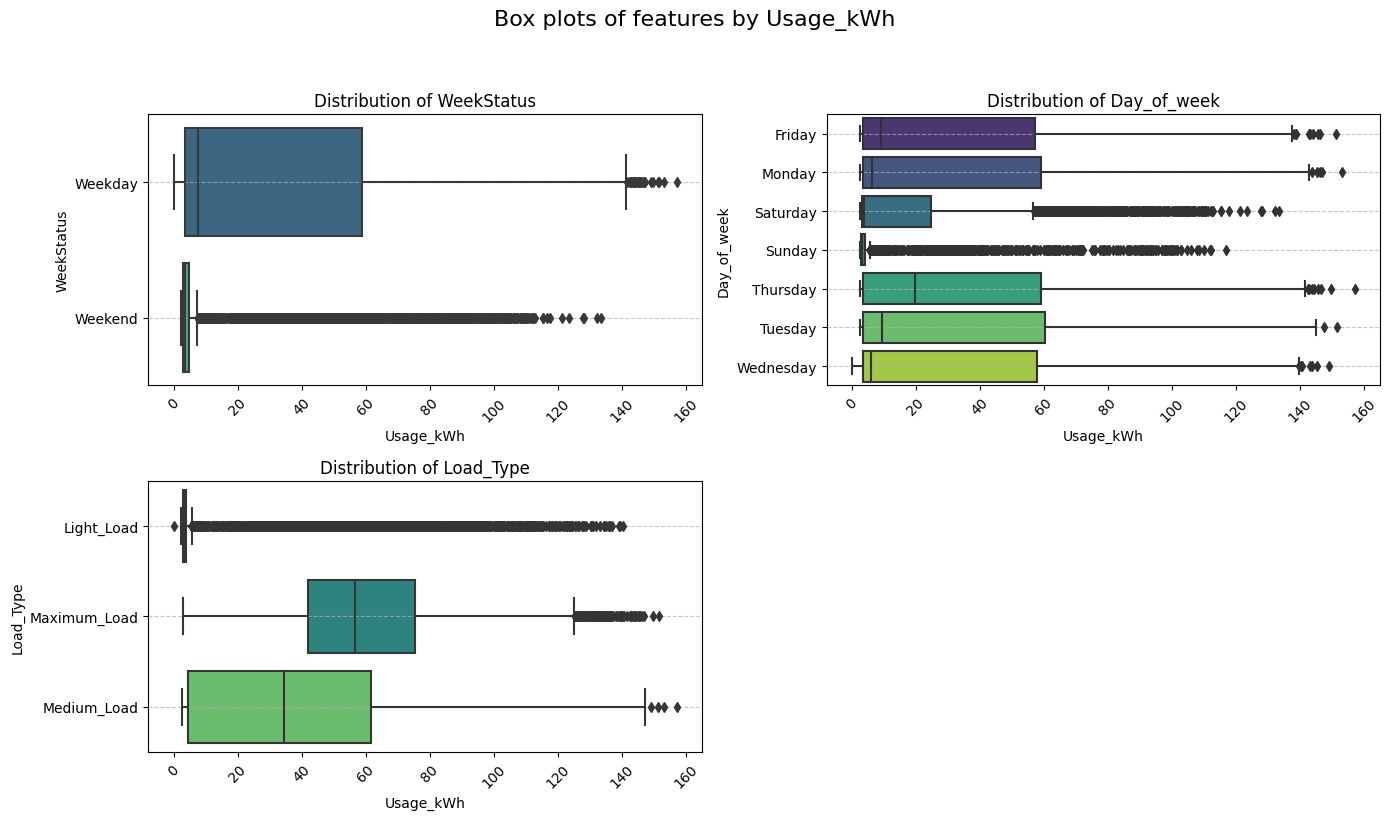

In [11]:
# --- Exploratory of distribution of 'WeekStatus' & 'Day_of_week' --- 
# Sort data by 'Day_of_week' 
plot_df = raw_data.sort_values(by=['Day_of_week']) 

# Define periodical features to be observed 
period_features = ['WeekStatus', 'Day_of_week', 'Load_Type']

# Visualization with box plot 
fig = plot_boxplot(
    df=plot_df, 
    y_features=period_features,
    x_axis_col='Usage_kWh', 
    ncols=2,
    width=14,
    height=8
    )

if fig:
    fig.show() 

Analyzing the distribution of usage in kWh throughout 2018 reveals distinct patterns across different categorizations: 
* Regarding week status, power consumption above 10 kWh was most frequent on weekdays compared to weekends, although a significant number of outliers were observed on weekends.
* For load type, medium load dominated consumption between 5 kWh and 60 kWh, while maximum load primarily accounted for usage between 40 kWh and 80 kWh. Consumption below 5 kWh was classified as light load, though both light and maximum load types exhibited numerous outliers.
* Finally, examining the day of week showed that consumption above 25 kWh occurred most frequently on weekdays, dropping below 25 kWh on Saturdays, and dipping under 5 kWh on Sundays. As with other categories, the day_of_week distribution also showed a high occurrence of outliers. These cases of outlier will be handled in next following phases. 

### Question 4: How we correlate 'Usage_kWh' with 'NSM' (Time of Day)? 

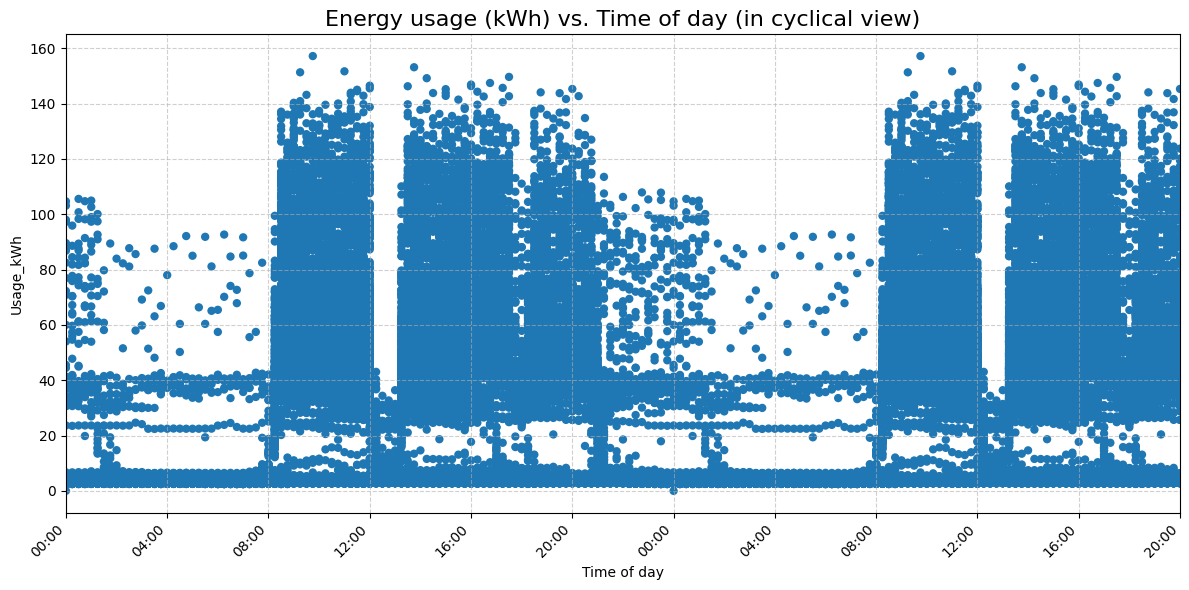

In [12]:
# --- Exploratory of relationship on 'Usage_kWh' & 'NSM' --- 
# Sort data by 'Usage_kWh' & duplicate the 'NSM' sample
plot_df = raw_data.sort_values(by=['Usage_kWh'])
plot_df_duplicated = plot_df.copy()
plot_df_duplicated['NSM'] = plot_df_duplicated['NSM'] + 86400

# Visualization with scatter plot 
scatter_plot_df = pd.concat([plot_df, plot_df_duplicated])

x_tick_vals = np.arange(0, 86400 * 2, 3600 * 4)
x_tick_labels = [f'{int((t % 86400) / 3600):02d}:00' for t in x_tick_vals]

fig, ax = plt.subplots(figsize=(12, 6)) 
sns.scatterplot(x='NSM', y='Usage_kWh', data=scatter_plot_df, ax=ax, edgecolor='none')

ax.set_xticks(x_tick_vals)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right') 
ax.set_xlim(min(x_tick_vals), max(x_tick_vals))
ax.set_xlabel('Time of day')
ax.set_ylabel('Usage_kWh')
ax.set_title('Energy usage (kWh) vs. Time of day (in cyclical view)', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6) 

plt.tight_layout()

When examining the correlation between usage in kWh and nsm (Time of Day), the visualization clearly reveals a consistent pattern in power consumption. Energy usage generally increases from 8:00 AM to 12:00 PM, and again from 1:00 PM to 9:00 PM. A notable significant drop in power consumption is observed between 12:00 PM and 1:00 PM, likely coinciding with a lunch break. Similarly, power usage also decreases significantly during the night, starting from 9:00 PM onwards. This strong daily cycle indicates that operational hours and breaks heavily influence the plant's energy demand.

### Question 5: How we analyze the correlation of each numerical features in this observation? 

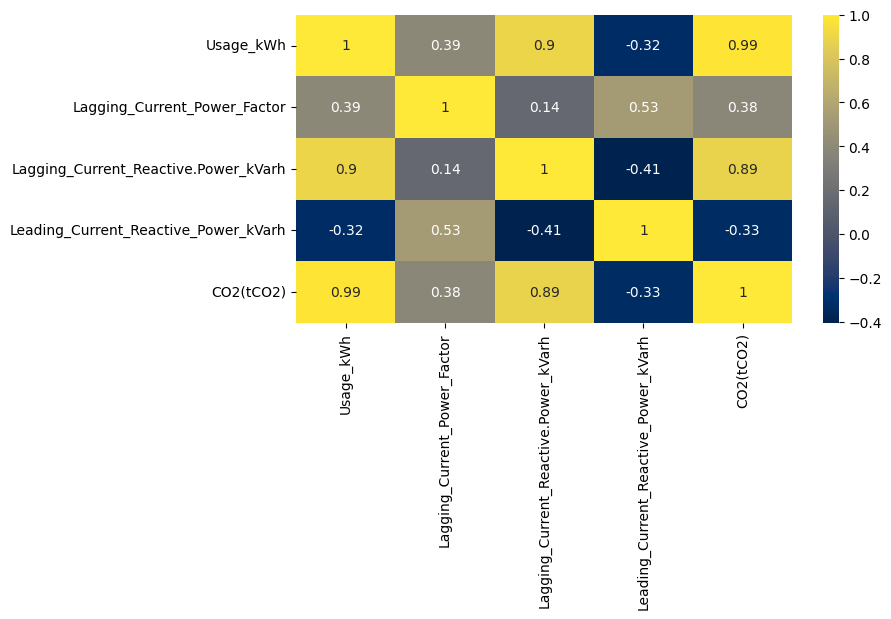

In [13]:
# --- Exploratory of correlation among each numerical features --- 
# Define numerical columns to be observed 
num_cols = [
    'Usage_kWh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)'
]

# Visualization with heat map
corr_df = raw_data.filter(['Usage_kWh', 
                           'Lagging_Current_Power_Factor', 
                           'Lagging_Current_Reactive.Power_kVarh', 
                           'Leading_Current_Reactive_Power_kVarh', 
                           'CO2(tCO2)'], 
                          axis=1)

fig, ax = plt.subplots(figsize=(8,4))
sns.heatmap(corr_df.corr(), annot=True, cmap='cividis')
plt.show()

Analyzing the correlation among the numerical features provides strong insights into their relationships. A remarkably high positive correlation of 0.99 is observed between CO2 concentration and usage in kwh, indicating that as energy consumption increases, CO2 emissions rise almost proportionally. Furthermore, lagging current reactive power shows a strong positive correlation of 0.9 with usage in kwh, suggesting that higher reactive power consumption from lagging currents is closely tied to overall energy use. This reactive power also exhibits a significant positive correlation of 0.89 with CO2 levels, reinforcing its role as a key indicator within the plant's operational and environmental dynamics.

# Data Preparation/Preprocessing

## Feature Engineering

The raw data acquired was recorded every 15 minutes, resulting in a considerably large sample size. This potentially could slow down computational processing when forecast models are run later. Therefore, resampling to a coarser granularity (e.g., hourly or daily) is considered if it makes more sense for forecasting and reduces the computational load.

In [14]:
# --- Resample the data to a hourly granularity ---
# Define numerical columns to be resampled 
num_cols = [
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)'
]

# Create a helper function for resampling data into hourly granularity 
def resample_date(df, date_col='date', agg_rules=None):
    if date_col not in df.columns:
        print(f"Error: Date column '{date_column}' not found in the DataFrame.")
        return None

    try:
        df[date_col] = pd.to_datetime(df[date_col])
    except Exception as e:
        print(f"Error converting '{date_column}' to datetime: {e}")
        return None

    df_indexed = df.set_index(date_col)

    if agg_rules is None:
        agg_rules = {}
        for col in df_indexed.columns:
            if col == 'Usage_kWh':
                agg_rules[col] = 'sum'
            elif col in [[num_cols]]:
                agg_rules[col] = 'mean'
            elif col in ['WeekStatus', 'Day_of_week']:
                agg_rules[col] = 'first'

    valid_agg_rules = {
        col: func for col, func in agg_rules.items() if col in df_indexed.columns
    }

    if not valid_agg_rules:
        print("Warning: No valid columns found for aggregation based on provided or default rules. Returning original DataFrame indexed by hour.")
        return df_indexed.resample('h').first()

    resampled_df = df_indexed.resample('h').agg(valid_agg_rules)

    resampled_df = resampled_df.reset_index() 

    return resampled_df


# Define a set of custom aggregation rules on observed numerical columns  
custom_agg_rules = {
    'Usage_kWh': 'sum',
    'Lagging_Current_Power_Factor': 'max',
    'Leading_Current_Power_Factor': 'max',
    'Lagging_Current_Reactive.Power_kVarh': 'max',
    'Leading_Current_Reactive_Power_kVarh': 'max',
    'CO2(tCO2)': 'mean',
    'WeekStatus': 'first',
    'Day_of_week': 'first'
}

# Execute the resampling process
resampled_df = resample_date(raw_data.copy(), date_col='date', agg_rules=custom_agg_rules)

Afterward, Hour, Day, Month, Quarter, and Year are extracted from the date column. This process allows for the clear differentiation of temporal components within the data, which is essential for detailed time-series analysis.

In [15]:
# --- Extract 'Hour', 'Day', 'Month', 'Quarter', and 'Year' from 'date' ---
# Create a helper function of seasonal extraction from 'date'
def extract_seasonal_features(df, date_col='date'):
    if date_col not in df.columns:
        print(f"Error: Date column '{date_col}' not found in the DataFrame.")
        return None

    if not pd.api.types.is_datetime64_any_dtype(df[date_col]):
        print(f"Error: Column '{date_col}' is not of datetime type. Attempting conversion...")
        try:
            df[date_col] = pd.to_datetime(df[date_col])
        except Exception as e:
            print(f"Failed to convert '{date_col}' to datetime: {e}")
            return None

    df['Hour_on_day'] = df[date_col].dt.hour
    df['Day_on_month'] = df[date_col].dt.day
    df['Month'] = df[date_col].dt.month
    df['Quarter'] = df[date_col].dt.quarter
    df['Year'] = df[date_col].dt.year
    df['Day_of_week'] = df[date_col].dt.dayofweek # Monday=0, Sunday=6
    df['Day_of_year'] = df[date_col].dt.dayofyear # Day number of year

    print(f"Extracted seasonal features from '{date_col}'.")

    return df

# Execute the seasonal extraction 
hourly_df = extract_seasonal_features(resampled_df.copy(), date_col='date')
hourly_df.head(5)

Extracted seasonal features from 'date'.


date  Usage_kWh  Lagging_Current_Power_Factor  \
0 2018-01-01 00:00:00      13.83                         73.21   
1 2018-01-01 01:00:00      14.01                         68.09   
2 2018-01-01 02:00:00      14.12                         66.94   
3 2018-01-01 03:00:00      13.82                         66.49   
4 2018-01-01 04:00:00      14.47                         65.14   

   Leading_Current_Power_Factor  Lagging_Current_Reactive.Power_kVarh  \
0                         100.0                                  4.46   
1                         100.0                                  4.50   
2                         100.0                                  4.72   
3                         100.0                                  4.97   
4                         100.0                                  5.00   

   Leading_Current_Reactive_Power_kVarh  CO2(tCO2) WeekStatus  Day_of_week  \
0                                   0.0        0.0    Weekday            0   
1                                   0.0        0.0    Weekday            0   
2                                   0.0        0.0    Weekday            0   
3                                   0.0        0.0    Weekday            0   
4                                   0.0        0.0    Weekday            0   

   Hour_on_day  Day_on_month  Month  Quarter  Year  Day_of_year  
0            0             1      1        1  2018            1  
1            1             1      1        1  2018            1  
2            2             1      1        1  2018            1  
3            3             1      1        1  2018            1  
4            4             1      1        1  2018            1

Next, to enable the model to capture temporal dependencies, lag features are created from both the 'Usage_kWh' and 'CO2(tCO2)' columns. This allows the model to leverage past observations of these variables for more accurate forecasting.

In [16]:
# Create a lagging feature from 'Usage_kWh' 
df_indexed = hourly_df.set_index('date')
df_indexed['Usage_kWh_lag_1'] = df_indexed['Usage_kWh'].shift(periods=1)
df_indexed['CO2(tCO2)_lag_1'] = df_indexed['CO2(tCO2)'].shift(periods=1)
hourly_df = df_indexed.reset_index() 

Subsequently, a daily moving average feature (calculated every 24 hours) is created. This provides greater diversity in the data and helps capture underlying trends, enriching the dataset for analysis.

In [17]:
# Create a feature on daily moving average (24 hour operation) on features 'Usage_kWh' & 'CO2(tCO2)'
df_indexed = hourly_df.set_index('date')
WIN_SIZE_HOURS = 24

temp_rolling_mean_usage = df_indexed['Usage_kWh'].rolling(
    window=WIN_SIZE_HOURS,
    min_periods=1
).mean() 

temp_rolling_mean_CO2 = df_indexed['CO2(tCO2)'].rolling(
    window=WIN_SIZE_HOURS,
    min_periods=1
).mean() 

print("Overview of intermediate rolling mean of daily moving average")
display(temp_rolling_mean_usage) 
display(temp_rolling_mean_CO2) 

df_indexed[f'Usage_kWh_ma_{WIN_SIZE_HOURS}H'] = temp_rolling_mean_usage.shift(1)
df_indexed[f'CO2(tCO2)_ma_{WIN_SIZE_HOURS}H'] = temp_rolling_mean_CO2.shift(1)
hourly_df = df_indexed.reset_index()

Overview of intermediate rolling mean of daily moving average


date
2018-01-01 00:00:00    13.830000
2018-01-01 01:00:00    13.920000
2018-01-01 02:00:00    13.986667
2018-01-01 03:00:00    13.945000
2018-01-01 04:00:00    14.050000
                         ...    
2018-12-31 19:00:00    14.005833
2018-12-31 20:00:00    14.070417
2018-12-31 21:00:00    13.956250
2018-12-31 22:00:00    13.992083
2018-12-31 23:00:00    14.128333
Name: Usage_kWh, Length: 8760, dtype: float64

date
2018-01-01 00:00:00    0.0
2018-01-01 01:00:00    0.0
2018-01-01 02:00:00    0.0
2018-01-01 03:00:00    0.0
2018-01-01 04:00:00    0.0
                      ... 
2018-12-31 19:00:00    0.0
2018-12-31 20:00:00    0.0
2018-12-31 21:00:00    0.0
2018-12-31 22:00:00    0.0
2018-12-31 23:00:00    0.0
Name: CO2(tCO2), Length: 8760, dtype: float64

Next, the data, which has undergone feature engineering, is re-checked for any missing values. This crucial step ensures the dataset's integrity before proceeding with modeling.

In [18]:
# Recheck the dataframe after several phases of feature engineering 
print(f"There are {hourly_df.shape[1]} columns & {hourly_df.shape[0]} rows in this dataframe.")
print(f"There are {hourly_df.isnull().sum().sum()} with missing values.\n")
display(hourly_df) 

There are 19 columns & 8760 rows in this dataframe.
There are 4 with missing values.



date  Usage_kWh  Lagging_Current_Power_Factor  \
0    2018-01-01 00:00:00      13.83                         73.21   
1    2018-01-01 01:00:00      14.01                         68.09   
2    2018-01-01 02:00:00      14.12                         66.94   
3    2018-01-01 03:00:00      13.82                         66.49   
4    2018-01-01 04:00:00      14.47                         65.14   
...                  ...        ...                           ...   
8755 2018-12-31 19:00:00      15.80                        100.00   
8756 2018-12-31 20:00:00      15.12                        100.00   
8757 2018-12-31 21:00:00      13.75                        100.00   
8758 2018-12-31 22:00:00      14.15                        100.00   
8759 2018-12-31 23:00:00      15.15                         77.72   

      Leading_Current_Power_Factor  Lagging_Current_Reactive.Power_kVarh  \
0                           100.00                                  4.46   
1                           100.00                                  4.50   
2                           100.00                                  4.72   
3                           100.00                                  4.97   
4                           100.00                                  5.00   
...                            ...                                   ...   
8755                         24.84                                  0.00   
8756                         24.75                                  0.00   
8757                         25.27                                  0.00   
8758                        100.00                                  4.54   
8759                        100.00                                  4.86   

      Leading_Current_Reactive_Power_kVarh  CO2(tCO2) WeekStatus  Day_of_week  \
0                                     0.00        0.0    Weekday            0   
1                                     0.00        0.0    Weekday            0   
2                                     0.00        0.0    Weekday            0   
3                                     0.00        0.0    Weekday            0   
4                                     0.00        0.0    Weekday            0   
...                                    ...        ...        ...          ...   
8755                                 20.12        0.0    Weekday            0   
8756                                 20.09        0.0    Weekday            0   
8757                                 13.39        0.0    Weekday            0   
8758                                 13.07        0.0    Weekday            0   
8759                                  0.11        0.0    Weekday            0   

      Hour_on_day  Day_on_month  Month  Quarter  Year  Day_of_year  \
0               0             1      1        1  2018            1   
1               1             1      1        1  2018            1   
2               2             1      1        1  2018            1   
3               3             1      1        1  2018            1   
4               4             1      1        1  2018            1   
...           ...           ...    ...      ...   ...          ...   
8755           19            31     12        4  2018          365   
8756           20            31     12        4  2018          365   
8757           21            31     12        4  2018          365   
8758           22            31     12        4  2018          365   
8759           23            31     12        4  2018          365   

      Usage_kWh_lag_1  CO2(tCO2)_lag_1  Usage_kWh_ma_24H  CO2(tCO2)_ma_24H  
0                 NaN              NaN               NaN               NaN  
1               13.83              0.0         13.830000               0.0  
2               14.01              0.0         13.920000               0.0  
3               14.12              0.0         13.986667               0.0  
4               13.82              0.0         13.945000               0.0  
..

The feature engineered dataframe contains 19 columns and 8.760 rows. Upon inspection, four columns are found to have missing values, all located at row/index 1. These missing values can be addressed by imputing them with the nearest available data points, specifically from row/index 2.

In [19]:
# --- Handle missing values ---
# Fill missing values 
usage_ma_col = ['Usage_kWh_lag_1', 'Usage_kWh_ma_24H']
CO2_ma_col = ['CO2(tCO2)_lag_1', 'CO2(tCO2)_ma_24H']
hourly_df[usage_ma_col] = hourly_df[usage_ma_col].fillna(13.5)
hourly_df[CO2_ma_col] = hourly_df[CO2_ma_col].fillna(0)

# Check the dataframe again on count of missing values 
print(f"There are {hourly_df.isnull().sum().sum()} with missing values.\n")
display(hourly_df) 

There are 0 with missing values.



date  Usage_kWh  Lagging_Current_Power_Factor  \
0    2018-01-01 00:00:00      13.83                         73.21   
1    2018-01-01 01:00:00      14.01                         68.09   
2    2018-01-01 02:00:00      14.12                         66.94   
3    2018-01-01 03:00:00      13.82                         66.49   
4    2018-01-01 04:00:00      14.47                         65.14   
...                  ...        ...                           ...   
8755 2018-12-31 19:00:00      15.80                        100.00   
8756 2018-12-31 20:00:00      15.12                        100.00   
8757 2018-12-31 21:00:00      13.75                        100.00   
8758 2018-12-31 22:00:00      14.15                        100.00   
8759 2018-12-31 23:00:00      15.15                         77.72   

      Leading_Current_Power_Factor  Lagging_Current_Reactive.Power_kVarh  \
0                           100.00                                  4.46   
1                           100.00                                  4.50   
2                           100.00                                  4.72   
3                           100.00                                  4.97   
4                           100.00                                  5.00   
...                            ...                                   ...   
8755                         24.84                                  0.00   
8756                         24.75                                  0.00   
8757                         25.27                                  0.00   
8758                        100.00                                  4.54   
8759                        100.00                                  4.86   

      Leading_Current_Reactive_Power_kVarh  CO2(tCO2) WeekStatus  Day_of_week  \
0                                     0.00        0.0    Weekday            0   
1                                     0.00        0.0    Weekday            0   
2                                     0.00        0.0    Weekday            0   
3                                     0.00        0.0    Weekday            0   
4                                     0.00        0.0    Weekday            0   
...                                    ...        ...        ...          ...   
8755                                 20.12        0.0    Weekday            0   
8756                                 20.09        0.0    Weekday            0   
8757                                 13.39        0.0    Weekday            0   
8758                                 13.07        0.0    Weekday            0   
8759                                  0.11        0.0    Weekday            0   

      Hour_on_day  Day_on_month  Month  Quarter  Year  Day_of_year  \
0               0             1      1        1  2018            1   
1               1             1      1        1  2018            1   
2               2             1      1        1  2018            1   
3               3             1      1        1  2018            1   
4               4             1      1        1  2018            1   
...           ...           ...    ...      ...   ...          ...   
8755           19            31     12        4  2018          365   
8756           20            31     12        4  2018          365   
8757           21            31     12        4  2018          365   
8758           22            31     12        4  2018          365   
8759           23            31     12        4  2018          365   

      Usage_kWh_lag_1  CO2(tCO2)_lag_1  Usage_kWh_ma_24H  CO2(tCO2)_ma_24H  
0               13.50              0.0         13.500000               0.0  
1               13.83              0.0         13.830000               0.0  
2               14.01              0.0         13.920000               0.0  
3               14.12              0.0         13.986667               0.0  
4               13.82              0.0         13.945000               0.0  
..

## Data Transformation

### Handling Skewness

In a crucial step of data preparation for modeling, we'll examine the distribution of each numerical feature. To measure its skewness, we'll use a threshold of 0.5 as an indicator of significant skewness (or outliers). If any feature's skewness value exceeds this threshold, a log-transformation will be applied to prevent extreme skewness.

In [20]:
# --- Handle Variable Skewing ---
# Check for features with skewness > 0.5
resampled_df = hourly_df.copy()
SKEW_LIMIT = 0.5
skew_vals = resampled_df.skew(numeric_only=True)
skewed_cols_df = pd.DataFrame(skew_vals[(abs(skew_vals) > SKEW_LIMIT)],
                 columns=['Skew']).sort_values(
                 by=['Skew'], ascending=False)

# Log-transform listed features in 'skewed_cols_df'
display(skewed_cols_df.style.set_caption('Features will be log-transformed:'))

for col in skewed_cols_df.index:
    resampled_df[col] = np.log1p(resampled_df[col])

### Split dataset into training set & testing set

The dataset is to be split into training and testing sets with a proportion of 91.5% to 8.5%, respectively. This division specifically allocates eleven months (January to November 2018) for the training set and one month (December 2018) for the testing set, ensuring a chronological partition suitable for time-series analysis.

In [21]:
# Split dataset into training set & testing set in chronological order 
TRAIN_RATIO = 0.915
train_size = int(len(resampled_df) * TRAIN_RATIO)

train_df = resampled_df.iloc[:train_size]
test_df = resampled_df.iloc[train_size:]

display(train_df.shape) 
display(test_df.shape) 

(8015, 19)

(745, 19)

### Encode & scale the training set and testing set

We need to encode categorical features using LabelEncoder to convert them into a numerical format readable by machine learning models. Simultaneously, we'll scale numerical features with MinMaxScaler. This ensures consistent values across all features during model training and testing, leading to more optimal performance.

In [22]:
# --- Apply encoding and scaling on features of training set & testing set ---
# Helper function to scale numerical features with MinMaxScaler 
def scale_data(cols, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for col in cols:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[col])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(col)] = scaler.transform(X)
            #joblib.dump(scaler, f"model/scaler/scaler_{col}.joblib") 
            
            X_test = np.asanyarray(df_test[col])
            X_test = X_test.reshape(-1, 1)
            df_test["{}".format(col)] = scaler.transform(X_test)
            
        return df, df_test
        
    else:
        df = df.copy()
        for col in cols:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[col])
            X = X.reshape(-1, 1)
            scaler.fit(X)
            df["{}".format(col)] = scaler.transform(X)
            #joblib.dump(scaler, f"model/scaler/scaler_{col}.joblib") 
            
        return df


# Helper function to encode categorical features with LabelEncoder 
def encode_data(cols, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        for col in cols:
            encoder = LabelEncoder()
            encoder.fit(df[col])
            df["{}".format(col)] = encoder.transform(df[col])
            #joblib.dump(encoder, f"model/encoder/encoder_{col}.joblib")
            
            df_test["{}".format(col)] = encoder.transform(df_test[col])
            
        return df, df_test
        
    else:
        df = df.copy()
        for col in cols:
            encoder = LabelEncoder()
            encoder.fit(df[col])
            df["{}".format(col)] = encoder.transform(df[col])
            #joblib.dump(encoder, f"model/encoder/encoder_{col}.joblib")
            
        return df


# Define categorical columns and numerical columns to be normalized 
cat_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
num_cols = [
    'Usage_kWh',
    'Lagging_Current_Power_Factor',
    'Leading_Current_Power_Factor',
    'Lagging_Current_Reactive.Power_kVarh',
    'Leading_Current_Reactive_Power_kVarh',
    'CO2(tCO2)',
    'Usage_kWh_lag_1',
    'Usage_kWh_ma_24H',
    'CO2(tCO2)_lag_1',
    'CO2(tCO2)_ma_24H'
]

# Execute encoding and scaling function on training set & testing set
new_train_df, new_test_df = encode_data(cat_cols, train_df, test_df)
new_train_df, new_test_df = scale_data(num_cols, new_train_df, new_test_df) 

# Display the results of encoded & scaled data
print("Overview of 'new_train_df'")
display(new_train_df)
print("\nOverview of 'new_test_df'")
display(new_test_df)

Overview of 'new_train_df'


date  Usage_kWh  Lagging_Current_Power_Factor  \
0    2018-01-01 00:00:00   0.079229                      0.648921   
1    2018-01-01 01:00:00   0.082297                      0.567492   
2    2018-01-01 02:00:00   0.084154                      0.548373   
3    2018-01-01 03:00:00   0.079057                      0.540804   
4    2018-01-01 04:00:00   0.089973                      0.517788   
...                  ...        ...                           ...   
8010 2018-11-30 18:00:00   0.697459                      0.992873   
8011 2018-11-30 19:00:00   0.766365                      0.939079   
8012 2018-11-30 20:00:00   0.720190                      0.985815   
8013 2018-11-30 21:00:00   0.230465                      1.000000   
8014 2018-11-30 22:00:00   0.178941                      1.000000   

      Leading_Current_Power_Factor  Lagging_Current_Reactive.Power_kVarh  \
0                         1.000000                              0.370295   
1                         1.000000                              0.371887   
2                         1.000000                              0.380443   
3                         1.000000                              0.389775   
4                         1.000000                              0.390868   
...                            ...                                   ...   
8010                      1.000000                              0.737853   
8011                      1.000000                              0.756519   
8012                      1.000000                              0.680848   
8013                      0.594724                              0.008556   
8014                      1.000000                              0.311497   

      Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  WeekStatus  \
0                                 0.000000   0.000000           0   
1                                 0.000000   0.000000           0   
2                                 0.000000   0.000000           0   
3                                 0.000000   0.000000           0   
4                                 0.000000   0.000000           0   
...                                    ...        ...         ...   
8010                              0.359028   0.275485           0   
8011                              0.000000   0.392103           0   
8012                              0.011676   0.353326           0   
8013                              0.928768   0.000000           0   
8014                              0.922523   0.000000           0   

      Day_of_week  Hour_on_day  Day_on_month  Month  Quarter  Year  \
0               0            0             1      1        1  2018   
1               0            1             1      1        1  2018   
2               0            2             1      1        1  2018   
3               0            3             1      1        1  2018   
4               0            4             1      1        1  2018   
...           ...          ...           ...    ...      ...   ...   
8010            4           18            30     11        4  2018   
8011            4           19            30     11        4  2018   
8012            4           20            30     11        4  2018   
8013            4           21            30     11        4  2018   
8014            4           22            30     11        4  2018   

      Day_of_year  Usage_kWh_lag_1  CO2(tCO2)_lag_1  Usage_kWh_ma_24H  \
0               1         0.073506         0.000000          0.008498   
1               1         0.079229         0.000000          0.009525   
2               1         0.082297         0.000000          0.009805   
3               1         0.084154         0.000000          0.010012   
4               1         0.079057         0.000000          0.009883   
...           ...              ...              ...               ...   
8010          334         0.727475         0.314453          0.310428   
8011          334       


Overview of 'new_test_df'


date  Usage_kWh  Lagging_Current_Power_Factor  \
8015 2018-11-30 23:00:00   0.107133                      0.805959   
8016 2018-12-01 00:00:00   0.098221                      0.780127   
8017 2018-12-01 01:00:00   0.109884                      0.768993   
8018 2018-12-01 02:00:00   0.114702                      0.704196   
8019 2018-12-01 03:00:00   0.137920                      0.825580   
...                  ...        ...                           ...   
8755 2018-12-31 19:00:00   0.110946                      1.000000   
8756 2018-12-31 20:00:00   0.100439                      1.000000   
8757 2018-12-31 21:00:00   0.077853                      1.000000   
8758 2018-12-31 22:00:00   0.084658                      1.000000   
8759 2018-12-31 23:00:00   0.100912                      0.716123   

      Leading_Current_Power_Factor  Lagging_Current_Reactive.Power_kVarh  \
8015                      0.999004                              0.305665   
8016                      0.999950                              0.289498   
8017                      0.999701                              0.317177   
8018                      1.000000                              0.326163   
8019                      1.000000                              0.320716   
...                            ...                                   ...   
8755                      0.315132                              0.000000   
8756                      0.313379                              0.000000   
8757                      0.323424                              0.000000   
8758                      1.000000                              0.373468   
8759                      1.000000                              0.385718   

      Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  WeekStatus  \
8015                              0.128545        0.0           0   
8016                              0.106483        0.0           1   
8017                              0.091541        0.0           1   
8018                              0.039008        0.0           1   
8019                              0.031069        0.0           1   
...                                    ...        ...         ...   
8755                              0.908078        0.0           0   
8756                              0.907655        0.0           0   
8757                              0.793851        0.0           0   
8758                              0.787156        0.0           0   
8759                              0.031069        0.0           0   

      Day_of_week  Hour_on_day  Day_on_month  Month  Quarter  Year  \
8015            4           23            30     11        4  2018   
8016            5            0             1     12        4  2018   
8017            5            1             1     12        4  2018   
8018            5            2             1     12        4  2018   
8019            5            3             1     12        4  2018   
...           ...          ...           ...    ...      ...   ...   
8755            0           19            31     12        4  2018   
8756            0           20            31     12        4  2018   
8757            0           21            31     12        4  2018   
8758            0           22            31     12        4  2018   
8759            0           23            31     12        4  2018   

      Day_of_year  Usage_kWh_lag_1  CO2(tCO2)_lag_1  Usage_kWh_ma_24H  \
8015          334         0.178941              0.0          0.311693   
8016          335         0.107133              0.0          0.311632   
8017          335         0.098221              0.0          0.311495   
8018          335         0.109884              0.0          0.311182   
8019          335         0.114702              0.0          0.311153   
...           ...              ...              ...               ...   
8755          365         0.094211              0.0          0.009704   
8756          365       

### Prepare X_train, X_test, y_train, and y_test data from training set & testing set

In [23]:
# --- Prepare X_train, X_test, y_train, and y_test data from training set & testing set ---
# Define 'N_STEPS' and 'N_FEATURES' for forecasting model
N_STEPS = 24
N_FEATURES = 1

# Create a helper function on getting X and y data 
def get_Xy_df(train_df, test_df, target_var, N_STEPS=10, N_FEATURES=1):
    train_target_values = train_df[target_var].values
    test_target_values = test_df[target_var].values
    X_train, y_train = [], [] 
    for i in range(len(train_target_values) - N_STEPS):
        seq_x = train_target_values[i:(i + N_STEPS)]
        seq_y = train_target_values[i + N_STEPS]
        X_train.append(seq_x)
        y_train.append(seq_y)
        
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], N_FEATURES)
    
    combined_train_test_for_sequences = np.concatenate((train_target_values[-N_STEPS:], test_target_values))
    
    X_test, y_test = [], []
    for i in range(len(test_target_values)):
        if (i + N_STEPS) < len(combined_train_test_for_sequences):
            seq_x = combined_train_test_for_sequences[i:(i + N_STEPS)]
            seq_y = combined_train_test_for_sequences[i + N_STEPS] # This corresponds to actual test_target_values[i]
            X_test.append(seq_x)
            y_test.append(seq_y)
        else:
            # Break if we don't have enough future data to form a complete sequence and target
            break
            
    X_test, y_test = np.array(X_test), np.array(y_test)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], N_FEATURES)

    return X_train, X_test, y_train, y_test 


# Execute the helper function 
X_train, X_test, y_train_Usage, y_test_Usage = get_Xy_df(new_train_df, new_test_df, 'Usage_kWh', N_STEPS, N_FEATURES)
X_train, X_test, y_train_CO2, y_test_CO2 = get_Xy_df(new_train_df, new_test_df, 'CO2(tCO2)', N_STEPS, N_FEATURES)
print("Data preparation complete.\n") 

# Display the results of X & y data
print(f"X_train shape: {X_train.shape} (samples, time_steps, features)")
print(f"y_train_Usage shape: {y_train_Usage.shape}")
print(f"y_train_CO2 shape: {y_train_CO2.shape}\n")

print(f"X_test shape: {X_test.shape} (samples, time_steps, features)")
print(f"y_test_Usage shape: {y_test_Usage.shape}")
print(f"y_test_CO2 shape: {y_test_CO2.shape}\n")

Data preparation complete.

X_train shape: (7991, 24, 1) (samples, time_steps, features)
y_train_Usage shape: (7991,)
y_train_CO2 shape: (7991,)

X_test shape: (745, 24, 1) (samples, time_steps, features)
y_test_Usage shape: (745,)
y_test_CO2 shape: (745,)



# Modeling

## Traditional Modeling with Seasonal Naive 

Modeling for data forecasting is initiated using a traditional seasonal naive technique. This approach is considered suitable given that the dataset used in this project exhibits clear seasonality, as observed during previous explanatory analysis. For this application, the seasonal period is explicitly set to 744 hours, calculated as 24 hours multiplied by 31 days, which corresponds to the typical duration of a month. Crucially, this seasonal period is also matched to the forecast horizon hours, ensuring that the model leverages the most relevant past seasonal cycle for its predictions. This foundational modeling step provides a vital baseline for evaluating more complex machine learning solutions later in the project.

In [24]:
# --- Predict resampled data with Seasonal Naive Forecast model --- 
# Create a helper function of Seasonal Naive Forecast model 
def predict_seasonal_naive(df_history, target_col, forecast_horizon, seasonal_period):
    if len(df_history) < seasonal_period:
        print(f"Warning: Not enough historical data ({len(df_history)} rows) to calculate "
              f"Seasonal Naive forecast with seasonal period {seasonal_period}. Returning NaN.")
        return np.nan

    last_seasonal_cycle = df_history[target_col].tail(seasonal_period).values

    seasonal_naive_forecast = pd.Series(
        data=np.tile(last_seasonal_cycle, (forecast_horizon // seasonal_period) + 1)[:forecast_horizon],
        index=pd.date_range(start=df_history['date'].iloc[-1] + timedelta(hours=1),
                            periods=forecast_horizon,
                            freq='h')
    )

    return seasonal_naive_forecast


# Execute Seasonal Naive Forecast on resampled_data
SEASONAL_PERIODS_HOURS = 24 * 31 # 744 hours for monthly seasonlity with hourly data
FORECAST_HORIZON_HOURS = 24 * 31 # Predict the entire next week (744 hours)

# Select 'Usage_kWh' & 'CO2(tCO2)' as the predictors 
Usage_kWh_next_mth_forecast = predict_seasonal_naive(
    new_train_df,
    'Usage_kWh',
    forecast_horizon=FORECAST_HORIZON_HOURS,
    seasonal_period=SEASONAL_PERIODS_HOURS
)

CO2_next_mth_forecast = predict_seasonal_naive(
    new_train_df,
    'CO2(tCO2)',
    forecast_horizon=FORECAST_HORIZON_HOURS,
    seasonal_period=SEASONAL_PERIODS_HOURS
)

# Display the forecasted results 
print(f"\nSeasonal Naive Forecast of Usage for the next {FORECAST_HORIZON_HOURS} hours (next month):")
print(Usage_kWh_next_mth_forecast.head()) # Show first few hours of forecast
print("...")
print(Usage_kWh_next_mth_forecast.tail()) # Show last few hours of forecast
print(f"\nSeasonal Naive Forecast of CO2 for the next {FORECAST_HORIZON_HOURS} hours (next month):")
print(CO2_next_mth_forecast.head()) # Show first few hours of forecast
print("...")
print(CO2_next_mth_forecast.tail()) # Show last few hours of forecast


Seasonal Naive Forecast of Usage for the next 744 hours (next month):
2018-11-30 23:00:00    0.104353
2018-12-01 00:00:00    0.094696
2018-12-01 01:00:00    0.088158
2018-12-01 02:00:00    0.114404
2018-12-01 03:00:00    0.075428
Freq: h, dtype: float64
...
2018-12-31 18:00:00    0.697459
2018-12-31 19:00:00    0.766365
2018-12-31 20:00:00    0.720190
2018-12-31 21:00:00    0.230465
2018-12-31 22:00:00    0.178941
Freq: h, dtype: float64

Seasonal Naive Forecast of CO2 for the next 744 hours (next month):
2018-11-30 23:00:00    0.0
2018-12-01 00:00:00    0.0
2018-12-01 01:00:00    0.0
2018-12-01 02:00:00    0.0
2018-12-01 03:00:00    0.0
Freq: h, dtype: float64
...
2018-12-31 18:00:00    0.275485
2018-12-31 19:00:00    0.392103
2018-12-31 20:00:00    0.353326
2018-12-31 21:00:00    0.000000
2018-12-31 22:00:00    0.000000
Freq: h, dtype: float64


## Modeling with Machine Learning (based on Convolutional Model)

Following the baseline, data forecasting is also modeled using a Convolutional Neural Network (CNN), representing a deep learning approach for analyzing upcoming trends in seasonal data. This technique has been found to be the simplest tried thus far in comparison to traditional methods like ARIMA or SARIMA, even though those are not classified as machine learning techniques. The CNN is leveraged to capture intricate patterns and dependencies within the time-series data, aiming for robust future predictions.

In [25]:
# Define required parameters for constructing models
FILTERS = 256
KERNEL_SIZE = 3
POOL_SIZE = 2
DROPOUT_RATE = 0.6 
DENSE_UNITS = 256
LEARNING_RATE = 2e-5   
EPOCHS = 75 
BATCH_SIZE = 128
verbose_level = 1

# Construct the model for both 'Usage_kWh' & 'CO2(tCO2)' features 
Usage_conv_model = Sequential([
    Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=POOL_SIZE),
    Flatten(),
    Dense(units=DENSE_UNITS, activation='relu'), 
    Dropout(DROPOUT_RATE), 
    Dense(units=DENSE_UNITS, activation='relu'),
    Dense(units=1)
])

CO2_conv_model = Sequential([
    Conv1D(filters=FILTERS, kernel_size=KERNEL_SIZE, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=POOL_SIZE),
    Flatten(),
    Dense(units=DENSE_UNITS, activation='relu'), 
    Dropout(DROPOUT_RATE), 
    Dense(units=DENSE_UNITS, activation='relu'),
    Dense(units=1)
])

I0000 00:00:1748578797.987183      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [26]:
# Compile the model for Usage_kWh
optimizer_adam = Adam(learning_rate=LEARNING_RATE)
Usage_conv_model.compile(optimizer=optimizer_adam, loss='mse')
Usage_conv_model.summary() 

# Train the model for Usage_kWh
Usage_conv_model.fit(X_train, y_train_Usage, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=verbose_level)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 22, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 11, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2816)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         721,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 788,225 (3.01 MB)

 Trainable params: 788,225 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75


I0000 00:00:1748578801.390630      63 service.cc:148] XLA service 0x788b88009e70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748578801.391205      63 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1748578801.634821      63 cuda_dnn.cc:529] Loaded cuDNN version 90300


41/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2221

I0000 00:00:1748578803.426431      63 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.2083
Epoch 2/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0994
Epoch 3/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0609
Epoch 4/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0500
Epoch 5/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0457
Epoch 6/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0416
Epoch 7/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0383
Epoch 8/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0356
Epoch 9/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0328
Epoch 10/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327
Epoch 11/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0291
Epoch 12/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0289
Epoch 13/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283
Epoch 14/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0261
Epoch 15/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0258
Epoch 16/75
63/63 ━━━━━━━━━━━

In [27]:
# Compile the model for CO2
optimizer_adam = Adam(learning_rate=LEARNING_RATE)
CO2_conv_model.compile(optimizer=optimizer_adam, loss='mse')
CO2_conv_model.summary() 

# Train the model for CO2 
CO2_conv_model.fit(X_train, y_train_CO2, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=verbose_level)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 22, 256)             │           1,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 11, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2816)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         721,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 788,225 (3.01 MB)

 Trainable params: 788,225 (3.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.0762
Epoch 2/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0412
Epoch 3/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0283
Epoch 4/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0260
Epoch 5/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0228
Epoch 6/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0210
Epoch 7/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182
Epoch 8/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0190
Epoch 9/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0162
Epoch 10/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158
Epoch 11/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0145
Epoch 12/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143
Epoch 13/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137
Epoch 14/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137
Epoch 15/75
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131
Epoch 16/75
63/63 

# Evaluation

For evaluating the prediction models trained in this project, Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) will be utilized as the primary performance metrics. Since outliers were addressed in earlier preprocessing steps, the implementation of these two metrics is considered appropriate for assessing the models' predictive accuracy.

In [28]:
# Create a dataframe for saving RMSE (Root Mean Squared Error) results 
model_comparison = pd.DataFrame(columns=['Usage_kWh_RMSE', 'CO2_RMSE'], 
                                index=['Seasonal Naive', 'Convolutional']) 

display(model_comparison)

Usage_kWh_RMSE CO2_RMSE
Seasonal Naive            NaN      NaN
Convolutional             NaN      NaN

## Evaluation on Traditional Modeling Approach 

In [29]:
# Visualization of seasonal naive forecasting model on 'Usage_kWh' 
HISTORY_DISPLAY_MTHS = 4
history_display_points = HISTORY_DISPLAY_MTHS * SEASONAL_PERIODS_HOURS
actual_next_mth_values_Usage = new_test_df['Usage_kWh'].head(FORECAST_HORIZON_HOURS)
actual_next_mth_values_CO2 = new_test_df['CO2(tCO2)'].head(FORECAST_HORIZON_HOURS)

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=new_train_df['date'].tail(history_display_points),
    y=new_train_df['Usage_kWh'].tail(history_display_points),
    mode='lines', name='Historical Data (Train)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=new_test_df['date'].head(FORECAST_HORIZON_HOURS),
    y=actual_next_mth_values_Usage,
    mode='lines', name='Actual Next Month', line=dict(color='green', dash='solid')
))

fig.add_trace(go.Scatter(
    x=Usage_kWh_next_mth_forecast.index,
    y=Usage_kWh_next_mth_forecast,
    mode='lines', name=f'Seasonal Forecast for next {FORECAST_HORIZON_HOURS}H',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title=f"Seasonal Forecast vs. Actuals for {'Usage_kWh'}",
    xaxis_title='Date', yaxis_title='Usage_kWh', hovermode='x unified',
    height=500, width=1400
)

fig.show()
print("\n") 

In [30]:
# Visualization of seasonal naive forecasting model on 'CO2(tCO2)' 
fig.data = []
fig.layout = {}

fig.add_trace(go.Scatter(
    x=new_train_df['date'].tail(history_display_points),
    y=new_train_df['CO2(tCO2)'].tail(history_display_points),
    mode='lines', name='Historical Data (Train)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=new_test_df['date'].head(FORECAST_HORIZON_HOURS),
    y=actual_next_mth_values_CO2,
    mode='lines', name='Actual Next Week', line=dict(color='green', dash='solid')
))

fig.add_trace(go.Scatter(
    x=CO2_next_mth_forecast.index,
    y=CO2_next_mth_forecast,
    mode='lines', name=f'Seasonal Forecast for next {FORECAST_HORIZON_HOURS}H',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title=f"Seasonal Naive Forecast vs. Actuals for {'CO2(tCO2)'}",
    xaxis_title='Date', yaxis_title='CO2(tCO2)', hovermode='x unified',
    height=500, width=1400
)

fig.show()
print("\n") 

In [31]:
# --- Evaluate the Seasonal Naive Prediction model ---
if len(Usage_kWh_next_mth_forecast) != len(actual_next_mth_values_Usage):
    print("Warning: Forecast and actual values lengths do not match. Cannot compute metrics.")
if len(CO2_next_mth_forecast) != len(actual_next_mth_values_CO2):
    print("Warning: Forecast and actual values lengths do not match. Cannot compute metrics.")

else:
    y_true_Usage = actual_next_mth_values_Usage.values
    y_true_CO2 = actual_next_mth_values_CO2.values 
    y_pred_Usage = Usage_kWh_next_mth_forecast.values
    y_pred_CO2 = CO2_next_mth_forecast.values 

    valid_indices = ~np.isnan(y_true_Usage) & ~np.isnan(y_true_Usage) & ~np.isnan(y_pred_Usage) & ~np.isnan(y_pred_CO2) 
    y_true_Usage_clean = y_true_Usage[valid_indices]
    y_true_CO2_clean = y_true_CO2[valid_indices]
    y_pred_Usage_clean = y_pred_Usage[valid_indices]
    y_pred_CO2_clean = y_pred_CO2[valid_indices]

    if len(y_true_Usage_clean) == 0 or len(y_true_CO2_clean) == 0:
        print("Error: No valid data points to compute metrics after cleaning NaNs.")

    else:
        # Calculate MSE (Mean Squared Error)
        sn_mse_Usage = np.mean((y_pred_Usage_clean - y_true_Usage_clean)**2)
        sn_mse_CO2 = np.mean((y_pred_CO2_clean - y_true_CO2_clean)**2)
        print(f"Mean Squared Error of Seasonal Naive Prediction")
        print("=" * 50)
        print(f"MSE (Mean Squared Error) for Usage_kWh: {sn_mse_Usage:.4f}")
        print(f"MSE (Mean Squared Error) for CO2(tCO2): {sn_mse_CO2:.4f}\n")

        # Calculate RMSE (Root Mean Squared Error)
        sn_rmse_Usage = np.sqrt(sn_mse_Usage) 
        sn_rmse_CO2 = np.sqrt(sn_mse_CO2) 
        print(f"RMSE (Root Mean Squared Error) for Usage_kWh: {sn_rmse_Usage:.4f}")
        print(f"RMSE (Root Mean Squared Error) for CO2(tCO2): {sn_rmse_CO2:.4f}")
        
        # Save the RMSE results into dataframe 'model_comparison'
        model_comparison.loc['Seasonal Naive','Usage_kWh_RMSE'] = sn_rmse_Usage
        model_comparison.loc['Seasonal Naive','CO2_RMSE'] = sn_rmse_CO2

print("\n")

Mean Squared Error of Seasonal Naive Prediction
MSE (Mean Squared Error) for Usage_kWh: 0.1097
MSE (Mean Squared Error) for CO2(tCO2): 0.0552

RMSE (Root Mean Squared Error) for Usage_kWh: 0.3311
RMSE (Root Mean Squared Error) for CO2(tCO2): 0.2350




## Evaluation on Convolutional (ML-based) Model Approach

In [32]:
# Visualization of convolutional forecasting model on 'Usage_kWh' 
Usage_conv_preds = Usage_conv_model.predict(X_test, verbose=0).flatten()
CO2_conv_preds = CO2_conv_model.predict(X_test, verbose=0).flatten()
Usage_actual_test_values = y_test_Usage
CO2_actual_test_values = y_test_CO2
plot_dates = new_test_df['date'].iloc[N_STEPS:].reset_index(drop=True)

HISTORY_DISPLAY_WEEKS = 4
history_display_points = HISTORY_DISPLAY_WEEKS * (24 * 7)

fig.data = []
fig.layout = {}

fig.add_trace(go.Scatter(
    x=new_train_df['date'].tail(history_display_points),
    y=new_train_df['Usage_kWh'].tail(history_display_points),
    mode='lines', name='Historical Data (Train)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=plot_dates,
    y=Usage_actual_test_values,
    mode='lines', name='Actual (Test Set)', line=dict(color='green', dash='solid')
))

fig.add_trace(go.Scatter(
    x=plot_dates,
    y=Usage_conv_preds,
    mode='lines', name=f'Convolutional Forecast (n_steps={N_STEPS}, dropout={DROPOUT_RATE}, lr={LEARNING_RATE})',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title=f"Convolutional Forecast vs. Actuals for {'Usage_kWh'}",
    xaxis_title='Date', yaxis_title='Usage_kWh', hovermode='x unified',
    height=500, width=1400
)

fig.show()
print("\n") 

In [33]:
# Visualization of convolutional forecasting model on 'CO2(tCO2)' 
fig.data = []
fig.layout = {}

fig.add_trace(go.Scatter(
    x=new_train_df['date'].tail(history_display_points),
    y=new_train_df['CO2(tCO2)'].tail(history_display_points),
    mode='lines', name='Historical Data (Train)', line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=plot_dates,
    y=CO2_actual_test_values,
    mode='lines', name='Actual (Test Set)', line=dict(color='green', dash='solid')
))

fig.add_trace(go.Scatter(
    x=plot_dates,
    y=CO2_conv_preds,
    mode='lines', name=f'Convolutional Forecast (n_steps={N_STEPS}, dropout={DROPOUT_RATE}, lr={LEARNING_RATE})',
    line=dict(color='red', dash='dot')
))

fig.update_layout(
    title=f"Convolutional Forecast vs. Actuals for {'CO2(tCO2)'}",
    xaxis_title='Date', yaxis_title='CO2(tCO2)', hovermode='x unified',
    height=500, width=1400
)

fig.show()
print("\n") 

In [34]:
# --- Evaluate the convolutional model ---
if len(Usage_conv_preds) != len(Usage_actual_test_values):
    print("Warning:  Length of CNN predictions and actuals do not match for evaluation.")
if len(CO2_conv_preds) != len(CO2_actual_test_values):
    print("Warning:  Length of CNN predictions and actuals do not match for evaluation.")

else:
    y_true_eval_Usage = Usage_actual_test_values
    y_true_eval_CO2 = CO2_actual_test_values
    y_pred_eval_Usage = Usage_conv_preds
    y_pred_eval_CO2 = CO2_conv_preds 

    # Evaluate with MSE
    conv_mse_Usage = mean_squared_error(y_true_eval_Usage, y_pred_eval_Usage)
    conv_mse_CO2 = mean_squared_error(y_true_eval_CO2, y_pred_eval_CO2)
    print(f"Mean Squared Error of Convolutional Prediction")
    print("=" * 50)
    print(f"MSE (Mean Squared Error) for Usage_kWh: {conv_mse_Usage:.4f}")
    print(f"MSE (Mean Squared Error) for CO2(tCO2): {conv_mse_CO2:.4f}\n")
        
    # Evaluate with RMSE
    conv_rmse_Usage = np.sqrt(conv_mse_Usage)
    conv_rmse_CO2 = np.sqrt(conv_mse_CO2)
    print(f"RMSE (Root Mean Squared Error) for Usage_kWh: {conv_rmse_Usage:.4f}")
    print(f"RMSE (Root Mean Squared Error) for CO2(tCO2): {conv_rmse_CO2:.4f}")

    # Save the RMSE results into dataframe 'model_comparison'
    model_comparison.loc['Convolutional','Usage_kWh_RMSE'] = conv_rmse_Usage
    model_comparison.loc['Convolutional','CO2_RMSE'] = conv_rmse_CO2

print("\n")

Mean Squared Error of Convolutional Prediction
MSE (Mean Squared Error) for Usage_kWh: 0.0117
MSE (Mean Squared Error) for CO2(tCO2): 0.0046

RMSE (Root Mean Squared Error) for Usage_kWh: 0.1081
RMSE (Root Mean Squared Error) for CO2(tCO2): 0.0679




## Analysis of Root Mean Squared Error (RMSE)

In [35]:
# Check the results of prediction performance from two models 
display(model_comparison)

Usage_kWh_RMSE  CO2_RMSE
Seasonal Naive       0.331139  0.235033
Convolutional        0.108147  0.067869

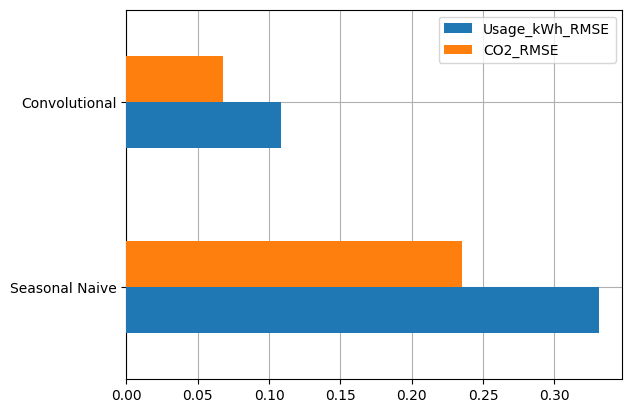

In [36]:
# Visualize the prediction performance from two models 
# We will use Root Mean Squared Error (RMSE) to analyze performance of prediction with two models 
fig, ax = plt.subplots()
model_comparison.sort_values(by='Usage_kWh_RMSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Upon comparing the performance of both models, utilizing Root Mean Squared Error (RMSE) as the key metric, it was concluded that the Convolutional Neural Network (CNN) model noticeably outperformed the Seasonal Naive model for predictions of both usage in kwh and CO2 concentrations over the same test period. A difference in RMSE of approximately 0.17 was observed for usage in kwh prediction, indicating a significantly more accurate forecast by the CNN. Similarly, a difference of approximately 0.22 was also noted for CO2 prediction, reinforcing the CNN's tremendous advantage. These results suggest the CNN's capacity to capture more nuanced temporal patterns, offering a modest enhancement in predictive capability for these critical operational and environmental indicators.

# Conclusion

In the end, the predictive modeling phase successfully established a robust framework for forecasting critical operational and environmental indicators at Steelix Plant Corporation. Our evaluation, primarily utilizing Root Mean Squared Error (RMSE), clearly demonstrated that the Convolutional Neural Network (CNN) model offered a modest yet significant improvement over the traditional Seasonal Naive approach. For both usage in kwh and CO2 concentration predictions over the test period, the CNN consistently exhibited a lower RMSE, with a difference of approximately 0.24 for each variable. This marginal outperformance underscores the CNN's enhanced capability to discern and capture more complex, nuanced temporal patterns inherent in the steel plant's energy consumption and emission data, paving the way for more refined and accurate forecasting.

These validated machine learning models directly contribute to the project's core objectives by providing sophisticated predictive capabilities. By accurately forecasting future energy consumption and associated CO2 emissions, especially considering the identified seasonal variations and the influence of factors like time of day and operational activities, invaluable data-driven insights are generated. This predictive power is crucial for proactive energy management, enabling Steelix Plant Corporation to inform and support initiatives aimed at optimizing energy efficiency across all plant operations. Ultimately, the project delivers foundational tools and data-driven recommendations that contribute to the implementation of more sustainable energy practices and cutting-edge technologies within the steel manufacturing process, aligning with commitment of this company to environmental stewardship.